Name: **Luong Nguyen**  
Student ID: **1504210**  

## Introduction to Deep Learning 

### Session04: handwritten digits and data augmentation (traning models)
____

### Import the packages needed for this assignment

In [2]:
# install keras on google colab
!pip install -q keras
# check if google colab's GPU is working?
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# import packages
import numpy as np
import keras
from keras import models, layers
import keras.preprocessing.image as image
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


## Prepare data

### Load data

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### Explore data

In [5]:
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


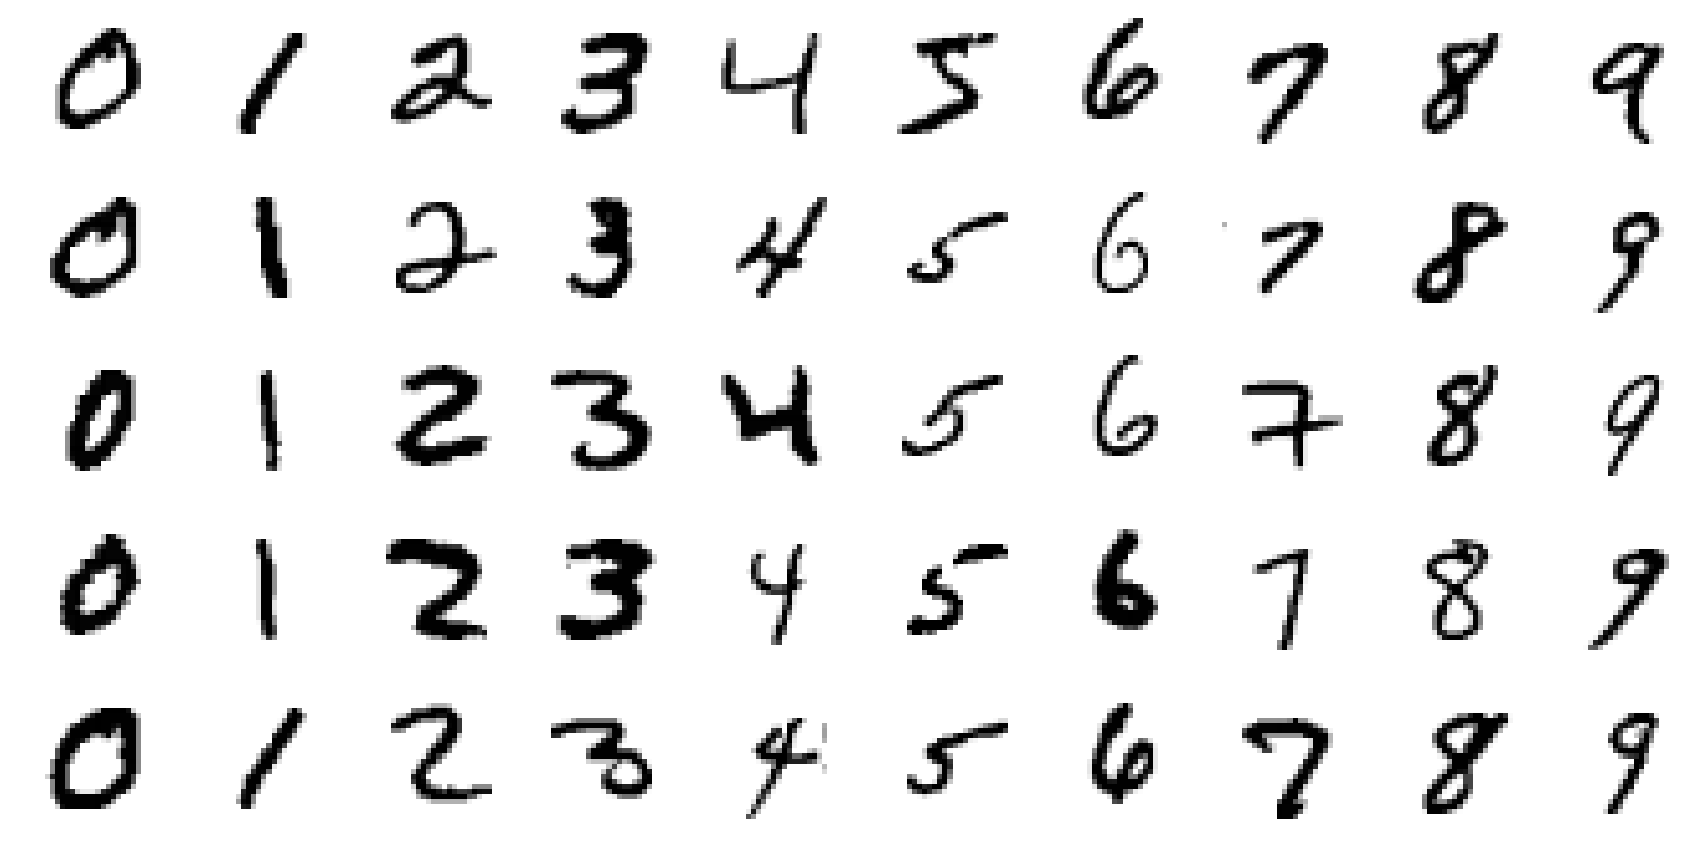

In [6]:
images_indices = []
# get the first 5 index of every number 
for i in range(5):
  for j in range(10):
    images_indices.append(np.argwhere(y_train == j)[i].item())
    
								
# plot examples of every number
rows = 5
f = plt.figure(figsize=(30,15))
for i in range(len(images_indices)):
    sp = f.add_subplot(rows, len(images_indices)//rows, i+1)
    sp.axis('Off')
    plt.imshow(x_train[images_indices[i]], cmap=plt.cm.binary)  

### Preprocess data

In [0]:
# categorically encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# x should have rank 4, the channels axis should have value 1
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [8]:
# Data shape after preprocessing
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

print("\nA sample of y_train: %s" % (str(y_train[3])))

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)

A sample of y_train: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Use convnet without data augmentation

In [0]:
from keras import models, layers

def build_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))


  model.add(layers.Flatten())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.summary()

  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

def plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [49]:
train_datagen = image.ImageDataGenerator(rescale=1./255)

test_datagen = image.ImageDataGenerator(rescale=1./255)

model = build_model()

history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, validation_data=test_datagen.flow(x_test, y_test, batch_size=32), epochs=10)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
__________

1875/1875 [==============================] - 23s 12ms/step - loss: 0.1182 - acc: 0.9634 - val_loss: 0.0320 - val_acc: 0.9892
Epoch 2/10
1639/1875 [=========================>....] - ETA: 2s - loss: 0.0492 - acc: 0.9856

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0487 - acc: 0.9856 - val_loss: 0.0508 - val_acc: 0.9861
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0386 - acc: 0.9887 - val_loss: 0.0371 - val_acc: 0.9887
Epoch 4/10
  32/1875 [..............................] - ETA: 23s - loss: 0.0387 - acc: 0.9854

1875/1875 [==============================] - 25s 13ms/step - loss: 0.0361 - acc: 0.9897 - val_loss: 0.0406 - val_acc: 0.9887
Epoch 5/10
1387/1875 [=====================>........] - ETA: 6s - loss: 0.0330 - acc: 0.9905

1875/1875 [==============================] - 24s 13ms/step - loss: 0.0348 - acc: 0.9903 - val_loss: 0.0316 - val_acc: 0.9900
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0340 - acc: 0.9911 - val_loss: 0.0297 - val_acc: 0.9915
Epoch 7/10
   1/1875 [..............................] - ETA: 30s - loss: 6.9361e-04 - acc: 1.0000

1875/1875 [==============================] - 25s 13ms/step - loss: 0.0355 - acc: 0.9910 - val_loss: 0.0392 - val_acc: 0.9906
Epoch 8/10
1433/1875 [=====================>........] - ETA: 5s - loss: 0.0354 - acc: 0.9915

1875/1875 [==============================] - 24s 13ms/step - loss: 0.0375 - acc: 0.9911 - val_loss: 0.0322 - val_acc: 0.9912
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0335 - acc: 0.9918 - val_loss: 0.0337 - val_acc: 0.9926
Epoch 10/10
 103/1875 [>.............................] - ETA: 20s - loss: 0.0330 - acc: 0.9909

1875/1875 [==============================] - 23s 13ms/step - loss: 0.0365 - acc: 0.9911 - val_loss: 0.0438 - val_acc: 0.9913


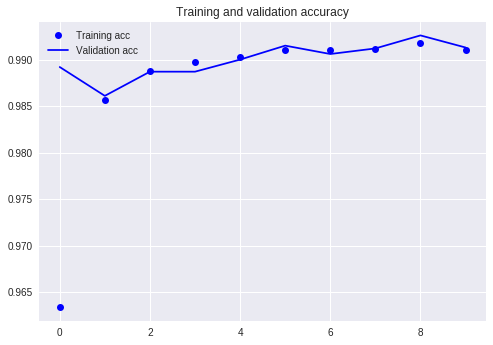

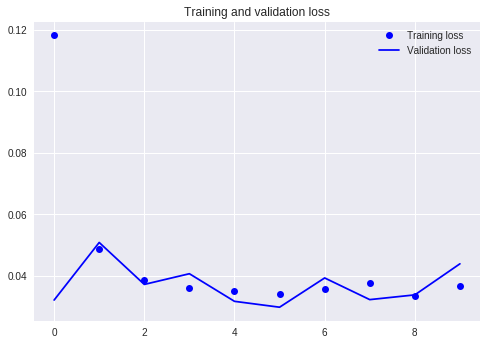

In [50]:
plot(history)

In [0]:
# I train the model on google colab, and save to access it from my computer and evaluate the model on my test digits
model.save('model1.h5')

from google.colab import files

files.download('model1.h5')

## Use convnet with data augmentation

In [53]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = image.ImageDataGenerator(rescale=1./255)

model = build_model()

# fits the model on batches with real-time data augmentation:
history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, validation_data=test_datagen.flow(x_test, y_test, batch_size=32), epochs=10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
__________

1875/1875 [==============================] - 31s 17ms/step - loss: 0.8991 - acc: 0.6973 - val_loss: 0.1570 - val_acc: 0.9505
Epoch 2/10
1014/1875 [===============>..............] - ETA: 13s - loss: 0.4475 - acc: 0.8577

1875/1875 [==============================] - 31s 17ms/step - loss: 0.4190 - acc: 0.8679 - val_loss: 0.1112 - val_acc: 0.9636
Epoch 3/10
1383/1875 [=====================>........] - ETA: 7s - loss: 0.3413 - acc: 0.8952

1875/1875 [==============================] - 30s 16ms/step - loss: 0.3386 - acc: 0.8961 - val_loss: 0.0949 - val_acc: 0.9697
Epoch 4/10
1512/1875 [=======================>......] - ETA: 5s - loss: 0.3119 - acc: 0.9037

1875/1875 [==============================] - 31s 16ms/step - loss: 0.3076 - acc: 0.9057 - val_loss: 0.1073 - val_acc: 0.9628
Epoch 5/10
1499/1875 [======================>.......] - ETA: 6s - loss: 0.2983 - acc: 0.9104

1875/1875 [==============================] - 31s 17ms/step - loss: 0.2940 - acc: 0.9118 - val_loss: 0.0976 - val_acc: 0.9692
Epoch 6/10
1485/1875 [======================>.......] - ETA: 6s - loss: 0.2947 - acc: 0.9112

1875/1875 [==============================] - 32s 17ms/step - loss: 0.2933 - acc: 0.9119 - val_loss: 0.0786 - val_acc: 0.9750
Epoch 7/10
1513/1875 [=======================>......] - ETA: 5s - loss: 0.2905 - acc: 0.9134

1875/1875 [==============================] - 31s 17ms/step - loss: 0.2889 - acc: 0.9137 - val_loss: 0.1119 - val_acc: 0.9641
Epoch 8/10
1531/1875 [=======================>......] - ETA: 5s - loss: 0.2989 - acc: 0.9119

1875/1875 [==============================] - 31s 17ms/step - loss: 0.2965 - acc: 0.9127 - val_loss: 0.0816 - val_acc: 0.9747
Epoch 9/10
1515/1875 [=======================>......] - ETA: 5s - loss: 0.3013 - acc: 0.9123

1875/1875 [==============================] - 31s 17ms/step - loss: 0.3010 - acc: 0.9118 - val_loss: 0.0757 - val_acc: 0.9773
Epoch 10/10
1561/1875 [=======================>......] - ETA: 4s - loss: 0.3049 - acc: 0.9119

1875/1875 [==============================] - 30s 16ms/step - loss: 0.3037 - acc: 0.9121 - val_loss: 0.0789 - val_acc: 0.9732


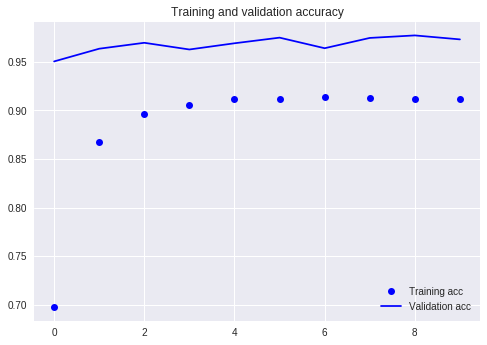

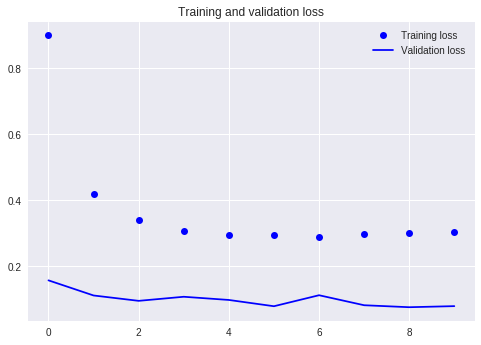

In [54]:
plot(history)

In [0]:
model.save('model2.h5')

files.download('model2.h5')